![LU Logo](https://www.df.lu.lv/fileadmin/user_upload/LU.LV/Apaksvietnes/Fakultates/www.df.lu.lv/Par_mums/Logo/DF_logo/01_DF_logo_LV.png)

# Pandas - premier data analysis library in Python

Pandas is a powerful open-source data analysis and manipulation library for Python. It provides two primary data structures: **Series** (one-dimensional) and **DataFrame** (two-dimensional), which facilitate the organization, cleaning, and statistical analysis of data. With a rich set of functions for reading from and writing to various data formats, as well as comprehensive tools for data transformation and exploration, Pandas has become a staple in the data science and analytics communities.

Pandas is widely used, open source, in active development and has great documentation.

Webpage: http://pandas.pydata.org/

## Creator of Pandas - Wes McKinney


Pandas was created by Wes McKinney in 2008. He started developing Pandas while he was at AQR Capital Management, primarily because he needed a flexible tool for quantitative analysis on financial data. Later, Wes McKinney published the book "Python for Data Analysis", which covers Pandas in detail and has helped in popularizing the library within the data science community.

[Python for Data Analysis book 3rd ed](https://www.amazon.com/Python-Data-Analysis-Wrangling-Jupyter-dp-109810403X/dp/109810403X)


![Python for Data Analysis book](https://m.media-amazon.com/images/I/51J1XFfaD4L._SX379_BO1,204,203,200_.jpg)

## Lesson Overview

We will cover the following topics:

* installing Pandas
* Pandas data structures 
  * Series
  * DataFrames
  * DateRange
* reading data from files into Pandas data structures
* Pandas data selection and indexing
* Pandas data manipulation
* Pandas data aggregation and grouping
* Pandas data visualization

## Lesson Prerequisites


* Basic Python syntax
* Basic Python data types
* Basic Python operators
* Conditional statements, branching with if, elif, else
* Loops: for and while
* Functions
* imports, modules and packages
* Data structures: lists, tuples, dictionaries, sets
* File I/O
* Basics of Object Oriented Programming - Classes and Objects
* Basics of NumPy


## Lesson Objectives

At the end of this lesson you should be able to:

* install Pandas
* create Pandas Series and DataFrames
* read data from files into Pandas data structures
* select and index data in Pandas data structures
* manipulate data in Pandas data structures
* aggregate and group data in Pandas data structures

---

### Setting up Pandas and basic operations

In [3]:
# check if we have pandas
try:
    import pandas as pd
except ImportError:
    print("pandas not found")

In [4]:
# we will also need numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# setting the max_rows parameter

#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

---
#### Pandas Installation

first we need to install pandas if we do not have it already

`!pip install pandas` from a jupyter notebook cell 
- this will install pandas in the current environment - preferably in a virtual environment

`pip install pandas` from the command line 
- will install pandas in the current environment

Pandas has many optional dependencies, which have to be installed separately
[Pandas Optional Dependencies](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html#install-optional-dependencies) 

---

### Create a DataFrame

In [6]:
my_data = {
    'Pilsēta': ['Rīga', 'Daugavpils', 'Liepāja'],
    'Iedz.skaits': [630000, 82000, 69000]
}

df = pd.DataFrame(my_data)
df

,Pilsēta,Iedz.skaits
0,Rīga,630000
1,Daugavpils,82000
2,Liepāja,69000


In [7]:
df2 = df.set_index(['Pilsēta'])
df2

,Iedz.skaits
Pilsēta,
Rīga,630000
Daugavpils,82000
Liepāja,69000


In [8]:
df2.loc["Rīga"]

Iedz.skaits    630000
Name: Rīga, dtype: int64

### Reading data files

In [9]:
# Pandas can read data not just from files but also from web URLs:

# city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
csv_url = "https://github.com/CaptSolo/LU_Python_2023/raw/main/notebooks/data/iedz_skaits_2018.csv"

city_data = pd.read_csv(csv_url, index_col=0)

In [188]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbos

In [10]:
city_data

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073
...,...
Viļaka,1301
Viļānu novads,5659
Viļāni,2891


In [190]:
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [191]:
type(city_data)

pandas.core.frame.DataFrame

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, 'Sabile'),
  Text(0.0, 0, 'Rīga'),
  Text(25.0, 0, 'Auces novads'),
  Text(50.0, 0, 'Dobele'),
  Text(75.0, 0, 'Kandavas novads'),
  Text(100.0, 0, 'Lubāna'),
  Text(125.0, 0, 'Priekules novads'),
  Text(150.0, 0, 'Sigulda'),
  Text(175.0, 0, 'Vecumnieku novads'),
  Text(200.0, 0, '')])

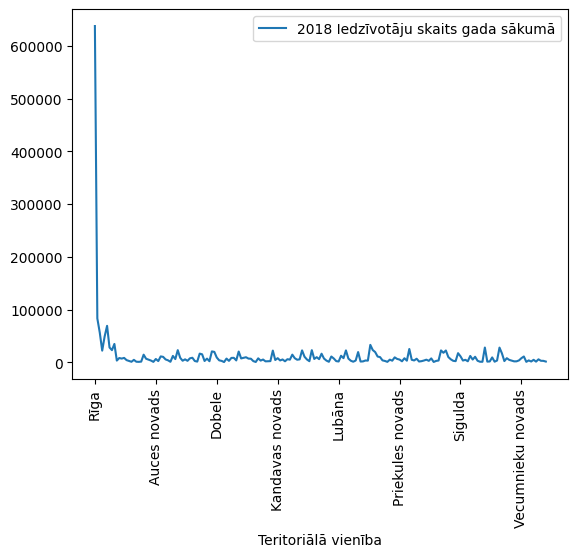

In [11]:
city_data.plot()
plt.xticks(rotation=90)

In [193]:
city_series = city_data.squeeze()
type(city_series)

pandas.core.series.Series

In [194]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [195]:
city_series["Liepāja"]

69180

In [196]:
city_series.sum()

2254964

In [197]:
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [198]:
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [199]:
bitmap = city_series < 1000
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Kocēnu novads        False
Rojas novads         False
Ikšķiles novads      False
Lielvārde            False
Subate                True
Lielvārdes novads    False
Rugāju novads        False
Rēzeknes novads      False
Jēkabpils novads     False
Ādažu novads         False
Piltene               True
Valka                False
Kuldīga              False
Kārsava              False
Mālpils novads       False
Balvu novads         False
Aglonas novads       False
Kandava              False
Babītes novads       False
Madonas novads       False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [200]:
city_series[bitmap].sort_index()

Teritoriālā vienība
Ainaži       689
Ape          850
Durbe        503
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Subate       635
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [201]:
city_series[bitmap].sort_values(ascending=False)

Teritoriālā vienība
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Ape          850
Ainaži       689
Subate       635
Durbe        503
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

### Pandas Series

A Series is a one-dimensional array-like object containing a sequence of values (
similar types to NumPy types) and an associated array of data labels - index.

Simplest Series is from an array of data.

In [202]:
# creating Pandas Series

s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [203]:
# we can perform operations on whole Series in one go:

s + 4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [ ]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [204]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [205]:
s2 ** 2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [ ]:
### Often Series have an index identifying each data point with a label 

In [206]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [207]:
## Working with Series data (with some similarities to dictionaries)

labeledSeries['g']

31

In [208]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [209]:
'd' in labeledSeries

True

In [210]:
labeledSeries.values

array([ 24,  77, -35,  31])

In [211]:
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [ ]:
# Series behaves like a fixed-length, ordered dictionary with extra helper methods

#### Can create Series from a dictionary by passing it to pd.Series()

In [212]:
citydict = {'Rīga': 630000, 'Daugavpils': 82000, 'Liepāja': 69000, 'Carnikava': 4800}

In [213]:
cseries = pd.Series(citydict)
cseries

Rīga          630000
Daugavpils     82000
Liepāja        69000
Carnikava       4800
dtype: int64

In [214]:
## Overwriting default index
clist = ['Jūrmala', 'Rīga', 'Daugavpils', 'Ogre', 'Liepāja']

cseries2 = pd.Series(citydict, index = clist)
cseries2

Jūrmala            NaN
Rīga          630000.0
Daugavpils     82000.0
Ogre               NaN
Liepāja        69000.0
dtype: float64

In [ ]:
# notice Carnikava was lost, since the new index does not have it
# and order was preserved from the given index list

In [215]:
# find missing data
cseries2.isnull()

Jūrmala        True
Rīga          False
Daugavpils    False
Ogre           True
Liepāja       False
dtype: bool

In [216]:
cseries2.dropna()

Rīga          630000.0
Daugavpils     82000.0
Liepāja        69000.0
dtype: float64

In [217]:
cseries2

Jūrmala            NaN
Rīga          630000.0
Daugavpils     82000.0
Ogre               NaN
Liepāja        69000.0
dtype: float64

In [218]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils     164000.0
Jūrmala             NaN
Liepāja        138000.0
Ogre                NaN
Rīga          1260000.0
dtype: float64

In [ ]:
# so NaN + number = NaN

In [219]:
# we can name the table and its index column

cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Rīga          630000
Daugavpils     82000
Liepāja        69000
Carnikava       4800
Name: Latvian Cities, dtype: int64

In [220]:
cseries.index

Index(['Rīga', 'Daugavpils', 'Liepāja', 'Carnikava'], dtype='object', name='City')

In [221]:
cseries.index = ['RīgaIsOld', 'Daugavpils', 'LiepājaWind', 'CarnikavaIsNotaCity']
cseries

RīgaIsOld              630000
Daugavpils              82000
LiepājaWind             69000
CarnikavaIsNotaCity      4800
Name: Latvian Cities, dtype: int64

In [222]:
# Series values are mutable
cseries['RīgaIsOld']=625000
cseries

RīgaIsOld              625000
Daugavpils              82000
LiepājaWind             69000
CarnikavaIsNotaCity      4800
Name: Latvian Cities, dtype: int64

In [223]:
# We can use rename() method to rename individual elements
cseries4 = cseries.rename(index={'RīgaIsOld':'RīgaRocks'})

In [224]:
cseries4["RīgaRocks"]

625000

### Integer (Position-based) vs Label-based Indexes

Working with pandas objects indexed by integers is something that often trips up
new users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you might not expect the following code
to generate an error:



In [13]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [226]:
ser[-1]

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in
general without introducing subtle bugs. 

Here we have an index containing 0, 1, 2,
but inferring what the user wants (label-based indexing or position-based) is difficult:


In [228]:
ser[2]

2.0

In [ ]:
## With a non-integer index there is no potential for ambiguity:

In [229]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

/var/folders/cy/880bvxy90j33f79df17qysyr0000gq/T/ipykernel_6591/2842014175.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser2[-1]


2.0

In [230]:
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [231]:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [ ]:
## To keep things consistent, if you have an axis index containing integers, data selection
## will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integer index):

In [232]:
ser2.loc['b']

1.0

In [233]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [234]:
ser.iloc[:1]

0    0.0
dtype: float64

* loc gets rows (or columns) with particular labels from the index.

* iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

# Date Range creation

Date ranges are used as indexes for time series data:
* https://pandas.pydata.org/docs/user_guide/10min.html#time-series

In [235]:
dates = pd.date_range('20220521', periods=15)
dates

DatetimeIndex(['2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03', '2022-06-04'],
              dtype='datetime64[ns]', freq='D')

In [236]:
pd.date_range('20220422', periods=15, freq="W")

DatetimeIndex(['2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15',
               '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12',
               '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
               '2022-07-17', '2022-07-24', '2022-07-31'],
              dtype='datetime64[ns]', freq='W-SUN')

In [237]:
pd.date_range('20220416', periods=7, freq="W-THU")

DatetimeIndex(['2022-04-21', '2022-04-28', '2022-05-05', '2022-05-12',
               '2022-05-19', '2022-05-26', '2022-06-02'],
              dtype='datetime64[ns]', freq='W-THU')

In [ ]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [238]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2023, 11, 21)

In [239]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
months

DatetimeIndex(['2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-03', '2024-07-01',
               '2024-08-01', '2024-09-02'],
              dtype='datetime64[ns]', freq='BMS')

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns. 
- each column can be a different value type (numeric, string, boolean, etc.). 

The DataFrame has both a row and a column index;

You can think of it as an ordered dict of Series all sharing the same row index. 

Underneath data is stored as one or more two-dimensional blocks (similar to ndarray).

In [ ]:
# There are different ways for creating DataFrames

# A common way is to create it from a dict of equal-length lists or NumPy arrays

In [240]:
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [241]:
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [ ]:
# missing column simply given Nans

In [242]:
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [243]:
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [ ]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)

In [244]:
df2.iat[3,2]=0.063
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [245]:
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [246]:
type(df2["budget"])

pandas.core.series.Series

In [247]:
# delete column by its name
del df2["budget"]
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


In [249]:
dates

DatetimeIndex(['2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03', '2022-06-04'],
              dtype='datetime64[ns]', freq='D')

In [250]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))
# We passed 15 rows of 5 random elements and set index to dates and columns to our basic list elements
df

,A,B,C,D,E
2022-05-21,0.258318,1.141930,-0.971614,-1.538216,0.129786
2022-05-22,1.029576,-0.536597,1.881339,-0.065350,-1.083148
2022-05-23,-0.792612,0.957656,-0.724829,0.938440,-0.530811
2022-05-24,-0.331742,0.864503,-1.232567,-0.234882,0.320412
2022-05-25,0.457415,0.057445,-0.158273,-0.827330,0.282931
2022-05-26,0.613438,0.375096,0.196641,-0.294887,-0.014706
2022-05-27,0.266940,-0.495732,-0.623209,-0.663262,-1.739789
2022-05-28,1.289656,0.271181,-0.278819,-0.304428,0.995485
2022-05-29,-1.569614,-0.301893,-0.005854,1.191960,0.169662
2022-05-30,-0.322958,1.191963,0.688554,-1.479925,-1.378743


In [251]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
#most columns need matching length!

Categorical data type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    

In [252]:
## s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [253]:
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [ ]:
## different datatypes for columns! 

In [254]:
df3.dtypes

A          float64
B    datetime64[s]
C          float64
D            int64
E         category
F           object
dtype: object

In [255]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [256]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [257]:
df.index

DatetimeIndex(['2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03', '2022-06-04'],
              dtype='datetime64[ns]', freq='D')

In [258]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [259]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

In [260]:
df3.describe()

,A,B,C,D
count,7.0,7,6.000000,7.000000
mean,1.0,2018-05-23 00:00:00,1.083333,13.000000
min,1.0,2018-05-23 00:00:00,-5.000000,0.000000
25%,1.0,2018-05-23 00:00:00,0.250000,2.500000
50%,1.0,2018-05-23 00:00:00,2.000000,9.000000
75%,1.0,2018-05-23 00:00:00,3.375000,20.500000
max,1.0,2018-05-23 00:00:00,4.000000,36.000000
std,0.0,NaN,3.352859,13.490738


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2022-05-21 to 2022-06-04
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       15 non-null     float64
 1   B       15 non-null     float64
 2   C       15 non-null     float64
 3   D       15 non-null     float64
 4   E       15 non-null     float64
dtypes: float64(5)
memory usage: 720.0 bytes


In [ ]:
# Sorting

In [262]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D,E
2022-05-21,0.258318,1.141930,-0.971614,-1.538216,0.129786
2022-05-22,1.029576,-0.536597,1.881339,-0.065350,-1.083148
2022-05-23,-0.792612,0.957656,-0.724829,0.938440,-0.530811
2022-05-24,-0.331742,0.864503,-1.232567,-0.234882,0.320412
2022-05-25,0.457415,0.057445,-0.158273,-0.827330,0.282931
2022-05-26,0.613438,0.375096,0.196641,-0.294887,-0.014706
2022-05-27,0.266940,-0.495732,-0.623209,-0.663262,-1.739789
2022-05-28,1.289656,0.271181,-0.278819,-0.304428,0.995485
2022-05-29,-1.569614,-0.301893,-0.005854,1.191960,0.169662
2022-05-30,-0.322958,1.191963,0.688554,-1.479925,-1.378743


In [ ]:
## Sort by Axis in reverse

In [264]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D,E
2022-06-04,-1.484976,-1.174159,1.298882,0.999207,0.506975
2022-06-03,0.391630,-0.840531,0.350361,-1.627242,-0.140584
2022-06-02,-0.202749,0.487537,-2.212099,0.770567,-0.605801
2022-06-01,-1.162073,0.440162,1.730289,-1.224454,-1.868553
2022-05-31,-0.070054,0.207790,0.499602,-0.282908,-0.300066
2022-05-30,-0.322958,1.191963,0.688554,-1.479925,-1.378743
2022-05-29,-1.569614,-0.301893,-0.005854,1.191960,0.169662
2022-05-28,1.289656,0.271181,-0.278819,-0.304428,0.995485
2022-05-27,0.266940,-0.495732,-0.623209,-0.663262,-1.739789
2022-05-26,0.613438,0.375096,0.196641,-0.294887,-0.014706


In [265]:
df3.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [ ]:
# Notice that NaN becomes last

### Selection 

Note: while standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

In [266]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [267]:
df3[:5]

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [268]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [269]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [270]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


## Selection by Label

For selecting data using labels:

In [271]:
df

,A,B,C,D,E
2022-05-21,0.258318,1.141930,-0.971614,-1.538216,0.129786
2022-05-22,1.029576,-0.536597,1.881339,-0.065350,-1.083148
2022-05-23,-0.792612,0.957656,-0.724829,0.938440,-0.530811
2022-05-24,-0.331742,0.864503,-1.232567,-0.234882,0.320412
2022-05-25,0.457415,0.057445,-0.158273,-0.827330,0.282931
2022-05-26,0.613438,0.375096,0.196641,-0.294887,-0.014706
2022-05-27,0.266940,-0.495732,-0.623209,-0.663262,-1.739789
2022-05-28,1.289656,0.271181,-0.278819,-0.304428,0.995485
2022-05-29,-1.569614,-0.301893,-0.005854,1.191960,0.169662
2022-05-30,-0.322958,1.191963,0.688554,-1.479925,-1.378743


In [273]:
dates

DatetimeIndex(['2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03', '2022-06-04'],
              dtype='datetime64[ns]', freq='D')

In [272]:
dates[0]

Timestamp('2022-05-21 00:00:00')

In [274]:
df.loc[dates[0]]

A    0.258318
B    1.141930
C   -0.971614
D   -1.538216
E    0.129786
Name: 2022-05-21 00:00:00, dtype: float64

In [275]:
df.loc[dates[2:5]]

,A,B,C,D,E
2022-05-23,-0.792612,0.957656,-0.724829,0.938440,-0.530811
2022-05-24,-0.331742,0.864503,-1.232567,-0.234882,0.320412
2022-05-25,0.457415,0.057445,-0.158273,-0.827330,0.282931


In [ ]:
## Selecting on a multi-axis by label:

In [277]:
df.loc[:, ['A','B','C']]

,A,B,C
2022-05-21,0.258318,1.141930,-0.971614
2022-05-22,1.029576,-0.536597,1.881339
2022-05-23,-0.792612,0.957656,-0.724829
2022-05-24,-0.331742,0.864503,-1.232567
2022-05-25,0.457415,0.057445,-0.158273
2022-05-26,0.613438,0.375096,0.196641
2022-05-27,0.266940,-0.495732,-0.623209
2022-05-28,1.289656,0.271181,-0.278819
2022-05-29,-1.569614,-0.301893,-0.005854
2022-05-30,-0.322958,1.191963,0.688554


In [278]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2022-05-23,-0.792612,0.957656,-0.724829
2022-05-24,-0.331742,0.864503,-1.232567
2022-05-25,0.457415,0.057445,-0.158273


In [279]:
df.loc['20220525':'20220601',['B','C']]

,B,C
2022-05-25,0.057445,-0.158273
2022-05-26,0.375096,0.196641
2022-05-27,-0.495732,-0.623209
2022-05-28,0.271181,-0.278819
2022-05-29,-0.301893,-0.005854
2022-05-30,1.191963,0.688554
2022-05-31,0.207790,0.499602
2022-06-01,0.440162,1.730289


In [ ]:
# Reduction in the dimensions of the returned object:

In [280]:
df.loc['20220526', ["B", "D"]]

B    0.375096
D   -0.294887
Name: 2022-05-26 00:00:00, dtype: float64

In [ ]:
## Getting scalars (single values)

In [281]:
df.loc['20220526', ["D"]]

D   -0.294887
Name: 2022-05-26 00:00:00, dtype: float64

In [282]:
type(df.loc['20220526', ["D"]])

pandas.core.series.Series

In [ ]:
# same as above

In [283]:
df.at[dates[5],'D']

-0.29488749227414834

In [ ]:
## Selection by Position

In [284]:
df.iloc[3]

A   -0.331742
B    0.864503
C   -1.232567
D   -0.234882
E    0.320412
Name: 2022-05-24 00:00:00, dtype: float64

In [ ]:
# By integer slices, acting similar to numpy/python:

In [285]:
df.iloc[2:5,:2]

,A,B
2022-05-23,-0.792612,0.957656
2022-05-24,-0.331742,0.864503
2022-05-25,0.457415,0.057445


In [ ]:
# By lists of integer position locations, similar to the numpy/python style:

In [286]:
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2022-05-24,0.864503,0.320412,-1.232567
2022-05-26,0.375096,-0.014706,0.196641
2022-05-22,-0.536597,-1.083148,1.881339


In [287]:
df.iloc[2,2]

-0.7248285820105268

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method):

In [288]:
df.iat[2,2]

-0.7248285820105268

## Boolean Indexing

In [289]:
# Using a single column’s values to select data
df[df.A > 0.2]

,A,B,C,D,E
2022-05-21,0.258318,1.141930,-0.971614,-1.538216,0.129786
2022-05-22,1.029576,-0.536597,1.881339,-0.065350,-1.083148
2022-05-25,0.457415,0.057445,-0.158273,-0.827330,0.282931
2022-05-26,0.613438,0.375096,0.196641,-0.294887,-0.014706
2022-05-27,0.266940,-0.495732,-0.623209,-0.663262,-1.739789
2022-05-28,1.289656,0.271181,-0.278819,-0.304428,0.995485
2022-06-03,0.391630,-0.840531,0.350361,-1.627242,-0.140584


In [290]:
df > 1

,A,B,C,D,E
2022-05-21,False,True,False,False,False
2022-05-22,True,False,True,False,False
2022-05-23,False,False,False,False,False
2022-05-24,False,False,False,False,False
2022-05-25,False,False,False,False,False
2022-05-26,False,False,False,False,False
2022-05-27,False,False,False,False,False
2022-05-28,True,False,False,False,False
2022-05-29,False,False,False,True,False
2022-05-30,False,True,False,False,False


In [291]:
# Table cells that match given criteria
df[df > 1]

,A,B,C,D,E
2022-05-21,NaN,1.141930,NaN,NaN,NaN
2022-05-22,1.029576,NaN,1.881339,NaN,NaN
2022-05-23,NaN,NaN,NaN,NaN,NaN
2022-05-24,NaN,NaN,NaN,NaN,NaN
2022-05-25,NaN,NaN,NaN,NaN,NaN
2022-05-26,NaN,NaN,NaN,NaN,NaN
2022-05-27,NaN,NaN,NaN,NaN,NaN
2022-05-28,1.289656,NaN,NaN,NaN,NaN
2022-05-29,NaN,NaN,NaN,1.19196,NaN
2022-05-30,NaN,1.191963,NaN,NaN,NaN


In [292]:
df[df <= 1] = np.nan
df["F"] = np.nan
df

,A,B,C,D,E,F
2022-05-21,NaN,1.141930,NaN,NaN,NaN,NaN
2022-05-22,1.029576,NaN,1.881339,NaN,NaN,NaN
2022-05-23,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-25,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-27,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-28,1.289656,NaN,NaN,NaN,NaN,NaN
2022-05-29,NaN,NaN,NaN,1.19196,NaN,NaN
2022-05-30,NaN,1.191963,NaN,NaN,NaN,NaN


In [293]:
# fill in missing values
df.fillna(value=0)

,A,B,C,D,E,F
2022-05-21,0.000000,1.141930,0.000000,0.00000,0.0,0.0
2022-05-22,1.029576,0.000000,1.881339,0.00000,0.0,0.0
2022-05-23,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2022-05-24,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2022-05-25,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2022-05-26,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2022-05-27,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2022-05-28,1.289656,0.000000,0.000000,0.00000,0.0,0.0
2022-05-29,0.000000,0.000000,0.000000,1.19196,0.0,0.0
2022-05-30,0.000000,1.191963,0.000000,0.00000,0.0,0.0


In [ ]:
# there is also df.dropna() to drop any ROWS(!) with missing data

### Modifying DataFrame data

In [294]:
df

,A,B,C,D,E,F
2022-05-21,NaN,1.141930,NaN,NaN,NaN,NaN
2022-05-22,1.029576,NaN,1.881339,NaN,NaN,NaN
2022-05-23,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-25,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-27,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-28,1.289656,NaN,NaN,NaN,NaN,NaN
2022-05-29,NaN,NaN,NaN,1.19196,NaN,NaN
2022-05-30,NaN,1.191963,NaN,NaN,NaN,NaN


In [295]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range('20220521', periods=15))
s1

2022-05-21       0
2022-05-22       1
2022-05-23       8
2022-05-24      27
2022-05-25      64
2022-05-26     125
2022-05-27     216
2022-05-28     343
2022-05-29     512
2022-05-30     729
2022-05-31    1000
2022-06-01    1331
2022-06-02    1728
2022-06-03    2197
2022-06-04    2744
Freq: D, dtype: int64

In [296]:
df['F'] = s1
df

,A,B,C,D,E,F
2022-05-21,NaN,1.141930,NaN,NaN,NaN,0
2022-05-22,1.029576,NaN,1.881339,NaN,NaN,1
2022-05-23,NaN,NaN,NaN,NaN,NaN,8
2022-05-24,NaN,NaN,NaN,NaN,NaN,27
2022-05-25,NaN,NaN,NaN,NaN,NaN,64
2022-05-26,NaN,NaN,NaN,NaN,NaN,125
2022-05-27,NaN,NaN,NaN,NaN,NaN,216
2022-05-28,1.289656,NaN,NaN,NaN,NaN,343
2022-05-29,NaN,NaN,NaN,1.19196,NaN,512
2022-05-30,NaN,1.191963,NaN,NaN,NaN,729


In [297]:
# setting cell values

df.at[dates[1], 'A'] = 33
df

,A,B,C,D,E,F
2022-05-21,NaN,1.141930,NaN,NaN,NaN,0
2022-05-22,33.000000,NaN,1.881339,NaN,NaN,1
2022-05-23,NaN,NaN,NaN,NaN,NaN,8
2022-05-24,NaN,NaN,NaN,NaN,NaN,27
2022-05-25,NaN,NaN,NaN,NaN,NaN,64
2022-05-26,NaN,NaN,NaN,NaN,NaN,125
2022-05-27,NaN,NaN,NaN,NaN,NaN,216
2022-05-28,1.289656,NaN,NaN,NaN,NaN,343
2022-05-29,NaN,NaN,NaN,1.19196,NaN,512
2022-05-30,NaN,1.191963,NaN,NaN,NaN,729


In [298]:
df.iat[4,4]= 42
df

,A,B,C,D,E,F
2022-05-21,NaN,1.141930,NaN,NaN,NaN,0
2022-05-22,33.000000,NaN,1.881339,NaN,NaN,1
2022-05-23,NaN,NaN,NaN,NaN,NaN,8
2022-05-24,NaN,NaN,NaN,NaN,NaN,27
2022-05-25,NaN,NaN,NaN,NaN,42.0,64
2022-05-26,NaN,NaN,NaN,NaN,NaN,125
2022-05-27,NaN,NaN,NaN,NaN,NaN,216
2022-05-28,1.289656,NaN,NaN,NaN,NaN,343
2022-05-29,NaN,NaN,NaN,1.19196,NaN,512
2022-05-30,NaN,1.191963,NaN,NaN,NaN,729


## Operations

DataFrame methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series methods and properties:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [299]:
dir(df)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__

In [301]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))

df

,A,B,C,D,E
2022-05-21,0.948089,-0.682395,-1.400404,-1.426981,-1.236667
2022-05-22,-0.396671,1.464109,0.420459,0.231915,0.005075
2022-05-23,1.127671,-1.339582,-1.147739,1.709667,-0.406523
2022-05-24,0.116504,1.665692,1.909450,-1.145710,0.894628
2022-05-25,-0.073622,-0.728244,-0.956937,-0.004276,-0.670240
2022-05-26,0.342266,0.516978,-1.074590,-1.149674,-0.609465
2022-05-27,-0.717518,1.224365,0.772202,-0.218963,-1.572091
2022-05-28,2.079146,0.644939,0.171606,-1.937017,1.333598
2022-05-29,1.373224,-0.603446,1.450331,0.884094,-1.995134
2022-05-30,0.002046,0.665652,-1.269187,0.321288,0.501687


In [302]:
df.mean()

A    0.234623
B    0.122572
C    0.167884
D   -0.259967
E   -0.538190
dtype: float64

In [303]:
df.max()

A    2.079146
B    1.665692
C    2.121517
D    1.709667
E    1.333598
dtype: float64

In [ ]:
# Other axis

In [304]:
df.mean(axis=1)

2022-05-21   -0.759671
2022-05-22    0.344977
2022-05-23   -0.011301
2022-05-24    0.688113
2022-05-25   -0.486664
2022-05-26   -0.394897
2022-05-27   -0.102401
2022-05-28    0.458454
2022-05-29    0.221814
2022-05-30    0.044297
2022-05-31   -0.804770
2022-06-01   -0.678742
2022-06-02   -0.182109
2022-06-03    0.983165
2022-06-04   -0.139498
Freq: D, dtype: float64

In [305]:
df.max(axis=1)

2022-05-21    0.948089
2022-05-22    1.464109
2022-05-23    1.709667
2022-05-24    1.909450
2022-05-25   -0.004276
2022-05-26    0.516978
2022-05-27    1.224365
2022-05-28    2.079146
2022-05-29    1.450331
2022-05-30    0.665652
2022-05-31    0.864233
2022-06-01    1.043899
2022-06-02    0.663897
2022-06-03    2.121517
2022-06-04    0.619720
Freq: D, dtype: float64

In [ ]:
## String operations (df.str.*)

In [306]:
import numpy as np
str1 = pd.Series(['APPle', 'baNAna', np.NaN, 42, 'mangO'])
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [307]:
[name for name in dir(str1.str) if not name.startswith("_")]

['capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'fullmatch',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 'removeprefix',
 'removesuffix',
 'repeat',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'slice',
 'slice_replace',
 'split',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'wrap',
 'zfill']

In [308]:
help(str1.str.lower)

Help on method lower in module pandas.core.strings.accessor:

lower() method of pandas.core.strings.accessor.StringMethods instance
    Convert strings in the Series/Index to lowercase.
    
    Equivalent to :meth:`str.lower`.
    
    Returns
    -------
    Series or Index of object
    
    See Also
    --------
    Series.str.lower : Converts all characters to lowercase.
    Series.str.upper : Converts all characters to uppercase.
    Series.str.title : Converts first character of each word to uppercase and
        remaining to lowercase.
    Series.str.capitalize : Converts first character to uppercase and
        remaining to lowercase.
    Series.str.swapcase : Converts uppercase to lowercase and lowercase to
        uppercase.
    Series.str.casefold: Removes all case distinctions in the string.
    
    Examples
    --------
    >>> s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
    >>> s
    0                 lower
    1              CAPITALS
    2   

In [309]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [310]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

In [ ]:
## Apply

In [311]:
df

,A,B,C,D,E
2022-05-21,0.948089,-0.682395,-1.400404,-1.426981,-1.236667
2022-05-22,-0.396671,1.464109,0.420459,0.231915,0.005075
2022-05-23,1.127671,-1.339582,-1.147739,1.709667,-0.406523
2022-05-24,0.116504,1.665692,1.909450,-1.145710,0.894628
2022-05-25,-0.073622,-0.728244,-0.956937,-0.004276,-0.670240
2022-05-26,0.342266,0.516978,-1.074590,-1.149674,-0.609465
2022-05-27,-0.717518,1.224365,0.772202,-0.218963,-1.572091
2022-05-28,2.079146,0.644939,0.171606,-1.937017,1.333598
2022-05-29,1.373224,-0.603446,1.450331,0.884094,-1.995134
2022-05-30,0.002046,0.665652,-1.269187,0.321288,0.501687


In [312]:
# Lambda functions are anonymous functions
# (functions defined without a name)

# We can apply a function over all DataFrame elements:

df.apply(lambda x: x*3) # ie same as df*3

,A,B,C,D,E
2022-05-21,2.844267,-2.047184,-4.201213,-4.280943,-3.710000
2022-05-22,-1.190012,4.392328,1.261376,0.695744,0.015224
2022-05-23,3.383013,-4.018745,-3.443218,5.129002,-1.219570
2022-05-24,0.349513,4.997076,5.728349,-3.437129,2.683883
2022-05-25,-0.220867,-2.184733,-2.870812,-0.012828,-2.010720
2022-05-26,1.026798,1.550934,-3.223769,-3.449023,-1.828394
2022-05-27,-2.152553,3.673094,2.316606,-0.656888,-4.716272
2022-05-28,6.237437,1.934816,0.514818,-5.811052,4.000795
2022-05-29,4.119672,-1.810338,4.350993,2.652283,-5.985401
2022-05-30,0.006137,1.996957,-3.807561,0.963863,1.505060


In [313]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   'data': range(6)}, 
                  columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [314]:
df.groupby('key')

In [315]:
[i for i in df.groupby('key')]

[('A',
    key  data
  0   A     0
  3   A     3),
 ('B',
    key  data
  1   B     1
  4   B     4),
 ('C',
    key  data
  2   C     2
  5   C     5)]

In [316]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [317]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis: 'Axis | lib.NoDefault' = <no_default>, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (th

In [318]:
## Merge

left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar", "other"], "rval": [4, 5, 0]})

In [319]:
left

,key,lval
0,foo,1
1,bar,2


In [320]:
right

,key,rval
0,foo,4
1,bar,5
2,other,0


In [321]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [322]:
pd.merge(left, right, on="key", how="right")

,key,lval,rval
0,foo,1.0,4
1,bar,2.0,5
2,other,NaN,0


### File operations

In [323]:
# writing to a CSV file
df.to_csv("test_pandas2.csv")

In [324]:
# reading from CSV file
new_df = pd.read_csv("test_pandas2.csv", index_col=0)
new_df.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


In [ ]:
# Excel

In [325]:
# this will raise an error if 'openpyxl' package is not installed
df.to_excel('test_pandas.xlsx', sheet_name='Sheet1')


In [326]:
df6 = pd.read_excel('test_pandas.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

In [327]:
df6.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


### Time series

In [328]:
ts = pd.Series(np.random.randn(3650), index=pd.date_range('11/18/2008', periods=3650))

In [329]:
ts

2008-11-18   -1.007981
2008-11-19    0.102635
2008-11-20   -0.364911
2008-11-21    1.335866
2008-11-22   -0.594598
                ...   
2018-11-11    1.195499
2018-11-12   -2.161493
2018-11-13    1.210431
2018-11-14   -0.846045
2018-11-15   -0.690590
Freq: D, Length: 3650, dtype: float64

In [330]:
ts = ts.cumsum() # cumulative sum

In [331]:
ts

2008-11-18    -1.007981
2008-11-19    -0.905346
2008-11-20    -1.270257
2008-11-21     0.065609
2008-11-22    -0.528988
                ...    
2018-11-11    32.795929
2018-11-12    30.634436
2018-11-13    31.844867
2018-11-14    30.998823
2018-11-15    30.308233
Freq: D, Length: 3650, dtype: float64

<Axes: >

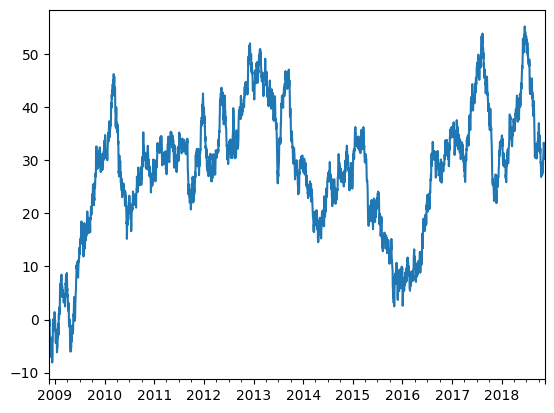

In [332]:
ts.plot()

In [333]:
ts["2014-01-01":"2016-01-01"] = np.NaN

<Axes: >

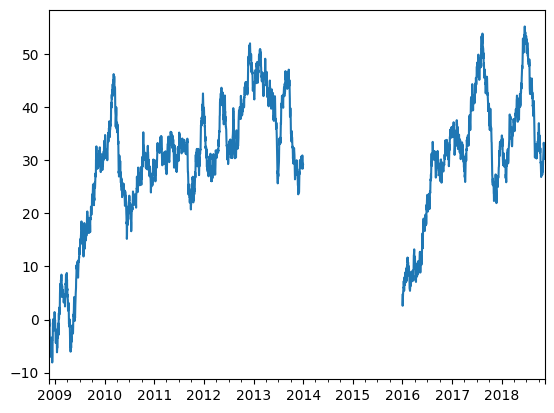

In [334]:
ts.plot()

In [335]:
rolling_avg = ts.rolling(window=90).mean()
rolling_avg

2008-11-18          NaN
2008-11-19          NaN
2008-11-20          NaN
2008-11-21          NaN
2008-11-22          NaN
                ...    
2018-11-11    33.071062
2018-11-12    32.935661
2018-11-13    32.826379
2018-11-14    32.704986
2018-11-15    32.594725
Freq: D, Length: 3650, dtype: float64

<Axes: >

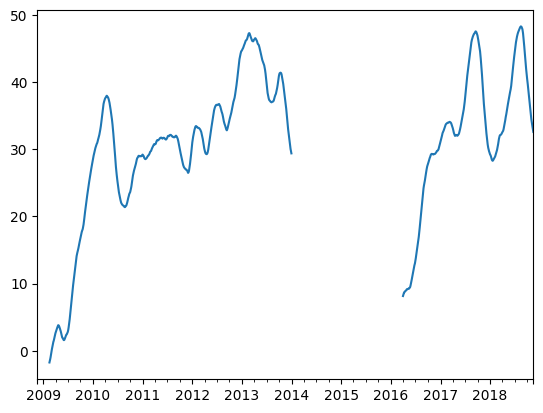

In [336]:
rolling_avg.plot()

---

## Additional Resources

- Documentation: http://pandas.pydata.org/pandas-docs/stable/
- Pandas Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

- https://www.dataschool.io/easier-data-analysis-with-pandas/ (video)

- Tutorials: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
  - ["Getting started"](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) - see also the "10 minutes to pandas" section
  - ["Modern Pandas"](http://tomaugspurger.github.io/modern-1-intro.html) tutorial
  - [Python Data Science Handbook - Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)